In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import albumentations as A

from efficientdet.dataset import CocoAlbumentationsDataset

In [2]:
DIR_DATASET = 'datasets/malaria'
SET_NAME = 'train'
IDX = 1
CAT_ID_TO_NAME = {
    1: 'leukocyte',
    2: 'trophozoite',
    3: 'schizont',
    4: 'ring',
    5: 'gametocyte'
}

In [3]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = map(int, bbox[:4])
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [4]:
training_set = CocoAlbumentationsDataset(root_dir=DIR_DATASET, set=SET_NAME,
                                             transform=A.Compose([A.HorizontalFlip(p=1.)],
                                                                 bbox_params=A.BboxParams(format='coco',
                                                                                          label_fields=['category_ids'],
                                                                                          min_visibility=0.2),),
                                             img_size=768, resize=False)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 2 2 2]


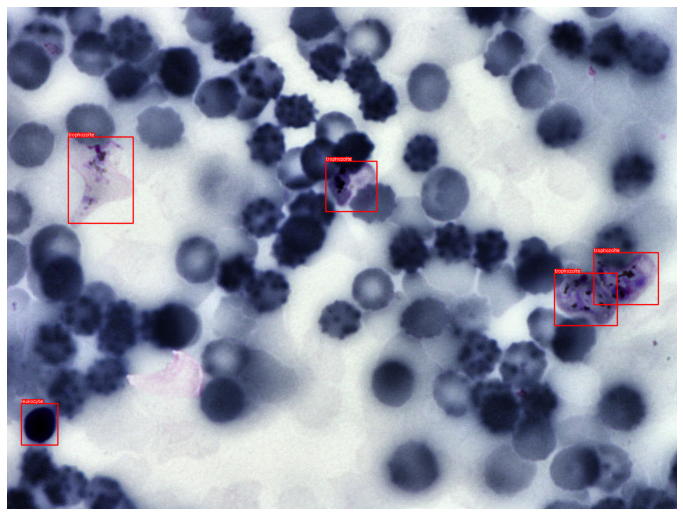

In [12]:
IDX = 4

sample = training_set[IDX]
img =  sample['img']
annotation = sample['annot']
annotation[:,-1] = annotation[:,-1] + 1

print(annotation[:,-1].astype('int'))

visualize(
    img,
    annotation,
    [int(ann[-1]) for ann in annotation],
    CAT_ID_TO_NAME,
)